In [22]:
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

print(os.listdir(DATA_FOLDER)[:1])

['saeb_treated_NO.pkl']


In [23]:
import pandas as pd

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_binary.pkl'))

print(len(df))
df.head()

50356


/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,ano,sigla_uf,escola_publica,id_aluno,situacao_censo,disciplina,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb,...,correcao_licao_casa,utiliza_biblioteca_escola,rede,id_escola,serie,turno,desempenho_aluno_cat,leitura,frequenta_entretenimento,incentivo_responsaveis
27111,2015,PB,1,17523018,0,MT,-0.627672,0.648351,214.882332,36.237847,...,1,1,2,25083490,9,3,0,1,1,1
27112,2015,PB,1,17491737,0,LP,-1.027257,0.354996,193.389947,19.557923,...,1,1,2,61134907,9,1,0,1,1,1
27115,2015,PB,1,17491737,0,MT,-0.807123,0.639382,204.852398,35.736548,...,1,1,2,61134907,9,1,0,1,1,1
27122,2015,PB,1,17488937,0,LP,-0.341425,0.380753,231.174739,20.976963,...,1,1,2,25027573,9,1,1,1,1,1
27123,2015,PB,1,17488937,0,MT,-0.906444,0.545208,199.301116,30.472944,...,1,1,2,25027573,9,1,0,1,1,1


In [144]:
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno']

In [145]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [146]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat', 'idade'])
y = df['desempenho_aluno_cat']

In [147]:
# valores únicos para X

for col in X.columns:
    print(col, X[col].unique())

escolaridade_mae [1 0]
mae_sabe_ler_escrever [1 0]
mae_le [1. 0.]
escolaridade_pai [0 1]
pai_sabe_ler_escrever [1. 0.]
pai_le [1. 0.]
possui_computador [1 0]
tempo_lazer [1 0]
gosta_estudar_disciplina [0. 1.]
faz_licao_casa [1 0]
correcao_licao_casa [1 0]
utiliza_biblioteca_escola [1 0]
leitura [1 0]
frequenta_entretenimento [1 0]
incentivo_responsaveis [1 0]


In [148]:
# distribuição das classes
class_distribution = y.value_counts(normalize=True)
print(class_distribution)

desempenho_aluno_cat
1    0.539082
0    0.260505
2    0.171698
3    0.028716
Name: proportion, dtype: float64


In [149]:
# transforming desempenho_aluno_cat from multiclass to binary (0, 1, 2, 3) = (0, 0, 1, 1)

y = y.apply(lambda x: 1 if x > 0 else 0)

# distribuição das classes
print(y.value_counts(normalize=True))

desempenho_aluno_cat
1    0.739495
0    0.260505
Name: proportion, dtype: float64


In [154]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

print(pd.Series(y).value_counts())

desempenho_aluno_cat
0    37238
1    37238
Name: count, dtype: int64


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [156]:
print(X_train.shape, X_val.shape, X_test.shape)

(47664, 15) (11916, 15) (14896, 15)


In [157]:
model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171 (684.00 B)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

In [158]:
history = model.fit(X_train, y_train, epochs=100, batch_size=48, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.5597 - loss: 0.6899 - val_accuracy: 0.5848 - val_loss: 0.6717
Epoch 2/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.5825 - loss: 0.6709 - val_accuracy: 0.5838 - val_loss: 0.6682
Epoch 3/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.5890 - loss: 0.6684 - val_accuracy: 0.5930 - val_loss: 0.6673
Epoch 4/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.5913 - loss: 0.6671 - val_accuracy: 0.5939 - val_loss: 0.6662
Epoch 5/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.5933 - loss: 0.6663 - val_accuracy: 0.5938 - val_loss: 0.6656
Epoch 6/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.5891 - loss: 0.6661 - val_accuracy: 0.5911 - val_loss: 0.6677
Epoch 7/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.5906 - loss: 0.6673 - val_accuracy: 0.5968 - val_loss: 0.6654
Epoch 8/100
993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.5898 - loss: 0

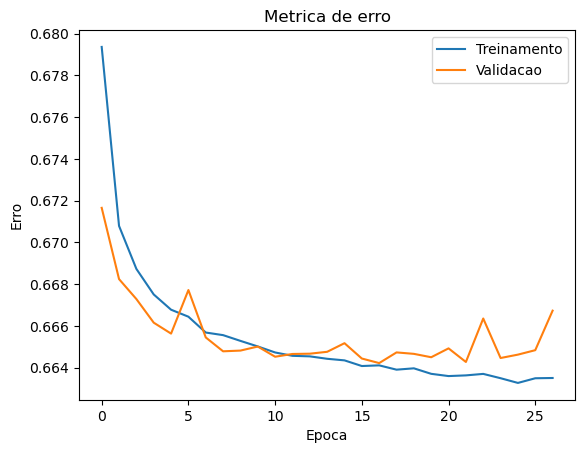

1490/1490 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step
373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step

--> Acuracia (treino): 0.5939
--> Acuracia (validacao): 0.5936
--> acc_train - acc_val = 0.0003
--> E_val - E_in = 0.0032


In [159]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# BOCA DO JACARÉ: Overfitting